In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Setting up the K-armed bandit environment
class KArmBandit:
    def __init__(self, k=10, epsilon=0.1):
        """
        Initialize the K-arm bandit system with specified epsilon and number of arms (articles).
        k: Number of arms (articles).
        epsilon: Probability of exploration vs exploitation.
        """
        self.k = k
        self.epsilon = epsilon
        self.article_views = np.zeros(k)  # Count views for each article (reward)
        self.article_pulls = np.zeros(k)  # Count how many times each article was promoted
        self.total_views = 0              # Track total views across all articles

    def choose_article(self):
        """
        Use epsilon-greedy to select an article to promote.
        Returns:
            (int) The chosen article index
        """
        if np.random.rand() < self.epsilon:
            # Exploration: randomly pick an article
            return np.random.randint(0, self.k)
        else:
            # Exploitation: choose the article with the highest average views
            avg_views = self.article_views / (self.article_pulls + 1e-5)  # Avoid divide by zero
            return np.argmax(avg_views)

    def update_views(self, article, views):
        """
        Update the reward (views) for the chosen article after promotion.
        article: The index of the chosen article.
        views: The views gained by promoting this article.
        """
        self.article_pulls[article] += 1  # Increment promotion count
        self.article_views[article] += views  # Update total views for this article
        self.total_views += views          # Update total view count

    def simulate_promotion(self, rounds=1000, true_mean_views=None):
        """
        Simulate the promotion process over a given number of rounds.
        rounds: Number of promotion rounds to simulate.
        true_mean_views: List of mean view values for each article (reward distribution).
        """
        if true_mean_views is None:
            # Randomly generate true mean views for each article
            true_mean_views = np.random.randint(50, 500, size=self.k)
        
        views_history = []  # Track total views over time

        for _ in range(rounds):
            article = self.choose_article()               # Choose article to promote
            views = np.random.poisson(true_mean_views[article])  # Simulate views as Poisson
            self.update_views(article, views)             # Update views for chosen article
            views_history.append(self.total_views)        # Record total views so far

        return views_history, true_mean_views



In [6]:
# Set parameters for the K-armed bandit
k = 10  # Number of articles
epsilon = 0.1  # Probability of exploring new articles
rounds = 1000  # Number of promotion rounds

# Instantiate the K-armed bandit system
bandit = KArmBandit(k=k, epsilon=epsilon)


In [7]:
# Simulate the promotion of articles and track total views over time
views_history, true_mean_views = bandit.simulate_promotion(rounds=rounds)


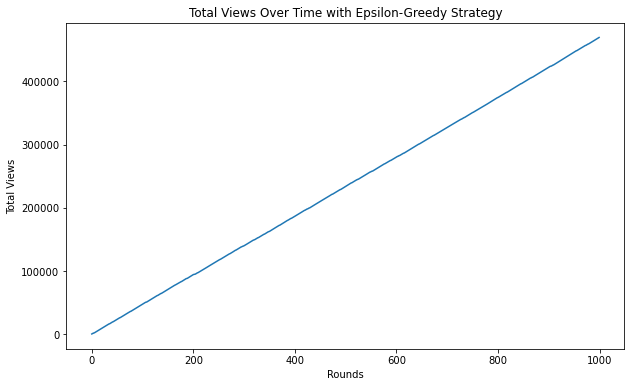

In [8]:
# Plot total views over time
plt.figure(figsize=(10, 6))
plt.plot(views_history)
plt.xlabel("Rounds")
plt.ylabel("Total Views")
plt.title("Total Views Over Time with Epsilon-Greedy Strategy")
plt.show()


In [9]:
# Display true mean views and estimated average views per article
print("True Mean Views per Article:", true_mean_views)
print("Estimated Average Views per Article:", bandit.article_views / (bandit.article_pulls + 1e-5))


True Mean Views per Article: [492 281 201 158 128 325 208 445 154 204]
Estimated Average Views per Article: [493.28100446 281.999718   204.16632639 160.71405612 131.15374527
 326.14239123 206.90890281 443.999556   153.11102605 202.99971   ]
